In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_california_housing
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn import set_config
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = fetch_california_housing()
housing_df = pd.DataFrame(data=data.data, columns=data.feature_names)
housing_df['target'] = data.target

In [3]:
display(housing_df)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
# To see the total number of missing values in each column
missing_values = housing_df.isnull().sum()
print(missing_values)

missing_percentage = housing_df.isnull().mean() * 100
print('\n', missing_percentage)

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

 MedInc        0.0
HouseAge      0.0
AveRooms      0.0
AveBedrms     0.0
Population    0.0
AveOccup      0.0
Latitude      0.0
Longitude     0.0
target        0.0
dtype: float64


In [5]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


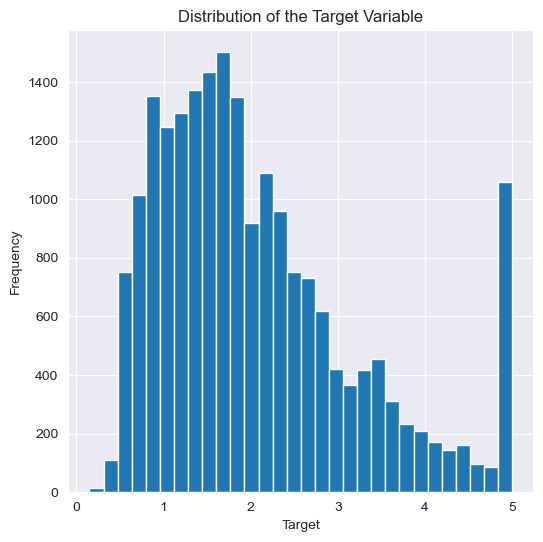

In [6]:
# Visualizing the target variable if it's normally distributed or not.
plt.figure(figsize=(6, 6))
housing_df['target'].hist(bins=30)
plt.title('Distribution of the Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

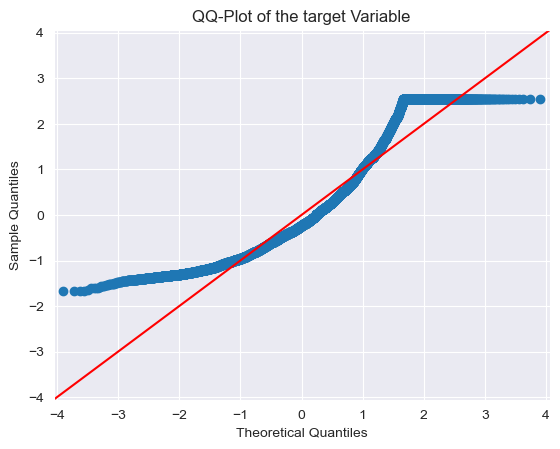

In [7]:
# Visualizing the target variable if it's normally distributed or not.
sm.qqplot(housing_df['target'], line='45', fit=True)
plt.title('QQ-Plot of the target Variable')
plt.show()

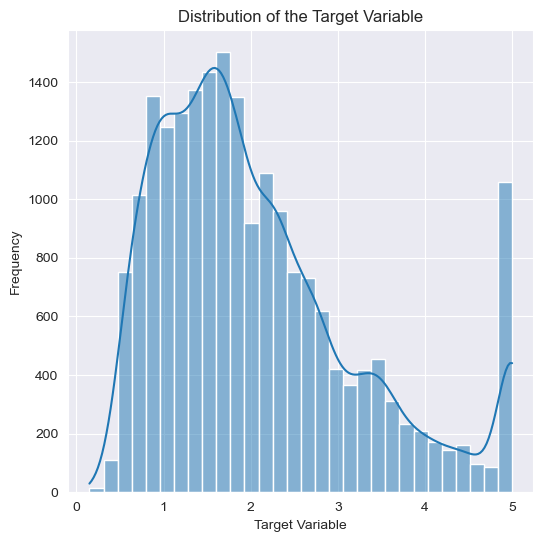

In [8]:
# Visualizing the target variable if it's normally distributed or not.
plt.figure(figsize=(6, 6))
sns.histplot(data=housing_df['target'], bins=30, kde=True)
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Distribution of the Target Variable')
plt.show()

In [9]:
# Calculate z-scores
z_scores = np.abs(stats.zscore(housing_df.select_dtypes(include=[np.number])))

# Get boolean mask where z-score is greater than 3
mask = (z_scores > 3).any(axis=1)

# Print rows with z-score greater than 3
outliers = housing_df[mask]
display(outliers)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
131,11.6017,18.0,8.335052,1.082474,533.0,2.747423,37.84,-122.19,3.92600
283,5.9849,22.0,6.528724,1.041179,4985.0,2.534316,37.79,-122.16,3.71000
409,10.0825,52.0,8.209016,1.024590,658.0,2.696721,37.90,-122.28,3.97000
510,11.8603,39.0,7.911111,0.984127,808.0,2.565079,37.82,-122.22,5.00001
511,13.4990,42.0,8.928358,1.000000,1018.0,3.038806,37.82,-122.22,5.00001
...,...,...,...,...,...,...,...,...,...
20529,2.9605,12.0,4.915341,1.022451,5633.0,2.634705,38.55,-121.78,2.04300
20530,3.1371,11.0,5.070223,1.015530,7984.0,2.695476,38.57,-121.76,2.01800
20544,2.0650,23.0,4.803493,1.013646,6330.0,3.455240,38.55,-121.76,2.19400
20563,3.1250,9.0,5.148007,1.119593,6837.0,2.899491,38.67,-121.75,1.32500


In [10]:
housing_df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object

In [11]:
# Constructing the pipeline of Preprocessing

# Creating a custom Transformer
class RemoveOutliers(BaseEstimator, TransformerMixin):
    def __init__(self, z_thresh=3.0):
        self.z_thresh = z_thresh

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        mask = np.abs(stats.zscore(X)) < self.z_thresh
        return X[mask.all(axis=1)]


# Create pipelines for numerical and categorical features

numeric_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

categorical_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# Define the numeric and categorical columns
numeric_columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
categorical_columns = []  # assuming no categorical columns

# Use ColumnTransformer to apply the transformations to the correct columns in the dataframe
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ]
)

set_config(display='diagram')

In [12]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
                                  'Population', 'AveOccup', 'Latitude',
                                  'Longitude']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [])])

In [13]:
# Hyperparameter Tuning
param_grid = [
    {
        'model': [LinearRegression()],
        'model__fit_intercept': [True, False]
    },
    {
        'model': [Ridge(), Lasso()],
        'model__alpha': [0.1, 1.0, 10.0, 0.01, 0.001],
        'model__fit_intercept': [True, False]
    }
]

estimator = Pipeline(steps=[('model', LinearRegression())])
grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Construct the full pipeline with the preprocessor and GridSearchCV
full_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('grid_search', grid_search)
    ]
)

In [14]:
# Removing the outliers
# outlier_removal = RemoveOutliers()
# housing_df = outlier_removal.transform(housing_df)

# Set the features and target variable
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [15]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup',
                                                   'Latitude', 'Longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('on...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('grid_search',
                 GridSearchCV(cv=5,
                              estimator=Pipeline(steps=[('model',
                                                         LinearRegression())]),
                              param_grid=[{'model': [LinearRegression()],
                                           'model__fit_intercept': [True,
                                                                    False]},
                                          {'model': [Ridge(),
                                                     Lasso(alpha=0.001)],
                                           'model__alpha': [0.1, 1.0, 10.0,
                                                            0.01, 0.001],
                                           'model__fit_intercept': [True,
                                                                    False]}],
                              scoring='neg_mean_squared_error'))])

In [16]:
# Access the cv_results_ dictionary
cv_results = full_pipeline.named_steps['grid_search'].cv_results_

# Get the best hyperparameters for each model
best_params_per_model = []
for params, mean_score in zip(cv_results['params'], cv_results['mean_test_score']):
    best_params_per_model.append((params['model'].__class__.__name__, params, mean_score))

best_params_per_model.sort(key=lambda x: x[2])

# Print the best hyperparameters for each model
for model_name, params, mean_score in best_params_per_model:
    print("Model:", model_name)
    print("Best Hyperparameters:", params)
    print("Mean Squared Error:", -mean_score, '\n')


Model: Lasso
Best Hyperparameters: {'model': Lasso(alpha=0.001), 'model__alpha': 1.0, 'model__fit_intercept': False}
Mean Squared Error: 5.629737221799769 

Model: Lasso
Best Hyperparameters: {'model': Lasso(alpha=0.001), 'model__alpha': 10.0, 'model__fit_intercept': False}
Mean Squared Error: 5.629737221799769 

Model: Lasso
Best Hyperparameters: {'model': Lasso(alpha=0.001), 'model__alpha': 0.1, 'model__fit_intercept': False}
Mean Squared Error: 4.967259837175215 

Model: Lasso
Best Hyperparameters: {'model': Lasso(alpha=0.001), 'model__alpha': 0.01, 'model__fit_intercept': False}
Mean Squared Error: 4.821670626743385 

Model: LinearRegression
Best Hyperparameters: {'model': LinearRegression(), 'model__fit_intercept': False}
Mean Squared Error: 4.818240100423759 

Model: Ridge
Best Hyperparameters: {'model': Ridge(), 'model__alpha': 0.001, 'model__fit_intercept': False}
Mean Squared Error: 4.818240098773171 

Model: Ridge
Best Hyperparameters: {'model': Ridge(), 'model__alpha': 0.01,

In [17]:
# Best model and the best hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_r2_score = grid_search.best_score_

print("Best Model:", best_model)
print("Best Hyperparameters:", best_params)
print("Best Score:", best_r2_score,'\n')

Best Model: Pipeline(steps=[('model', Lasso(alpha=0.001))])
Best Hyperparameters: {'model': Lasso(alpha=0.001), 'model__alpha': 0.001, 'model__fit_intercept': True}
Best Score: -0.5192468796642637 



In [18]:
# Cross Validation
scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')

# Get the mean score
mean_score = scores.mean()
print("Mean Cross-Validated R^2 Score:", mean_score)

y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("\nBest Model:", best_model)
print("R2 Score:", r2)

Mean Cross-Validated R^2 Score: 0.6114760503819732

Best Model: Pipeline(steps=[('model', Lasso(alpha=0.001))])
R2 Score: -4303.448687446214


C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [19]:
# Predicted Values
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [20]:
# The Mean Squared Error
print('The Training Data mean squard error: %0.2f' % mean_squared_error(y_true=y_train, y_pred=y_pred_train))
print('The Test Data mean squard error: %0.2f' % mean_squared_error(y_true=y_test, y_pred=y_pred_test))

# The coefficient of determination: 1 is perfect prediction
print('\n\nCoefficient of determination (R^2) of training data: %.2f' % r2_score(y_true=y_train, y_pred=y_pred_train))
print('Coefficient of determination (R^2) of test data: %.2f' % r2_score(y_true=y_test, y_pred=y_pred_test))


The Training Data mean squard error: 5639.46
The Test Data mean squard error: 5640.59


Coefficient of determination (R^2) of training data: -4217.70
Coefficient of determination (R^2) of test data: -4303.45


In [21]:
# combine the numeric and one-hot column names
feature_names = numeric_columns + categorical_columns

# The parameter values
best_model = full_pipeline.named_steps['grid_search'].best_estimator_
parameter_estimates = best_model.named_steps['model'].coef_
print(parameter_estimates)

for i, feature_name in enumerate(feature_names):
    print('Feature: %s \t Score: %0.2f' % (feature_name, parameter_estimates[i]))

[ 0.84914038  0.12334631 -0.28127333  0.32604963 -0.00106185 -0.03988954
 -0.88582217 -0.85809324]
Feature: MedInc 	 Score: 0.85
Feature: HouseAge 	 Score: 0.12
Feature: AveRooms 	 Score: -0.28
Feature: AveBedrms 	 Score: 0.33
Feature: Population 	 Score: -0.00
Feature: AveOccup 	 Score: -0.04
Feature: Latitude 	 Score: -0.89
Feature: Longitude 	 Score: -0.86
